load 30m poloniex data

In [1]:
cd ..

/home/daniel/python/rl-portfolio-management


In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
dfs=[]
for infile in glob.glob('./data/bloomberg_data/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    # just the cols from jiang 2017
    df = df[['close','high','low','open']]
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
# sort by time lengths
dfs.sort(key=lambda x:len(x), reverse=True)
[(df.name,df.index[0]) for df in dfs]

[('djindu', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('gs_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('ba_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('msft_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('jpm_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('trv_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('csco_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('utx_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('cat_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('ge_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('axp_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('aapl_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('mmm_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('intc_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('ibm_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('v_data', Timestamp('2017-07-06 14:30:00', freq='30T'))]

In [5]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [6]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2018-07-01')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
#dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
print([str(min(df.index)) for df in dfs1])

['2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00']


In [7]:
# something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
blacklist = ['DOGEBTC', 'XRPBTC']
dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [8]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 16 to 16


In [9]:
# reindex
mi = dfs1[0].index.copy()
for i in range(len(dfs1)):
    name = dfs1[i].name
    dfs[i]=dfs1[i].reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]=0
    dfs[i].name = name

In [10]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Stock','Price'])
df

Stock                  djindu                               gs_data          \
Price                   close      high       low      open   close    high   
date                                                                          
2017-07-06 14:30:00  21362.26  21433.10  21353.34  21423.93  225.83  228.48   
2017-07-06 15:00:00  21369.59  21377.98  21338.16  21362.65  227.39  227.59   
2017-07-06 15:30:00  21372.10  21383.21  21358.45  21369.45  227.18  227.32   
2017-07-06 16:00:00  21389.13  21414.87  21373.35  21375.33  227.05  227.79   
2017-07-06 16:30:00  21405.05  21407.29  21385.98  21389.71  227.51  227.68   
2017-07-06 17:00:00  21380.17  21410.59  21377.54  21405.21  227.68  228.14   
2017-07-06 17:30:00  21389.61  21395.82  21378.70  21380.00  228.51  228.52   
2017-07-06 18:00:00  21415.60  21417.04  21389.74  21389.81  229.90  229.95   
2017-07-06 18:30:00  21382.62  21415.63  21378.97  21415.57  228.62  230.06   
2017-07-06 19:00:00  21360.14  21384.08  21346.11  21382.76  228.11  228.64   
2017-07-06 19:30:00  21359.34  21362.29  21343.57  21360.26  227.49  228.07   
2017-07-06 20:00:00  21332.26  21362.71  21332.26  21359.35  227.02  227.59   
2017-07-06 20:30:00  21323.12  21335.29  21305.38  21332.27  226.62  227.06   
2017-07-06 21:00:00  21320.04  21323.54  21320.04  21323.33     NaN     NaN   
2017-07-06 21:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 22:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 22:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 23:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 23:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 00:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 00:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 01:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 01:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 02:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 02:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 03:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 03:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 04:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 04:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 05:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
...                       ...       ...       ...       ...     ...     ...   
2018-03-12 05:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 06:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 06:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 07:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 07:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 08:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 08:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 09:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 09:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 10:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 10:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 11:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 11:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 12:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 12:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 13:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 13:30:00  25416.23  25449.15  25367.66 

In [11]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 11964
to 11963


In [12]:
# fill in na's
#df = df.fillna(method="pad")

#Dropping na's instead
df = df.dropna()

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
df

Stock                      djindu                                            \
Price                       close          high           low          open   
date                                                                          
2017-07-06 15:00:00  21369.589844  21377.980469  21338.160156  21362.650391   
2017-07-06 15:30:00  21372.099609  21383.210938  21358.449219  21369.449219   
2017-07-06 16:00:00  21389.130859  21414.869141  21373.349609  21375.330078   
2017-07-06 16:30:00  21405.050781  21407.289062  21385.980469  21389.710938   
2017-07-06 17:00:00  21380.169922  21410.589844  21377.539062  21405.210938   
2017-07-06 17:30:00  21389.609375  21395.820312  21378.699219  21380.000000   
2017-07-06 18:00:00  21415.599609  21417.039062  21389.740234  21389.810547   
2017-07-06 18:30:00  21382.619141  21415.630859  21378.970703  21415.570312   
2017-07-06 19:00:00  21360.140625  21384.080078  21346.109375  21382.759766   
2017-07-06 19:30:00  21359.339844  21362.289062  21343.570312  21360.259766   
2017-07-06 20:00:00  21332.259766  21362.710938  21332.259766  21359.349609   
2017-07-06 20:30:00  21323.119141  21335.289062  21305.380859  21332.269531   
2017-07-07 14:30:00  21386.410156  21397.160156  21350.720703  21354.660156   
2017-07-07 15:00:00  21375.609375  21389.429688  21352.779297  21385.960938   
2017-07-07 15:30:00  21373.470703  21390.509766  21370.000000  21375.640625   
2017-07-07 16:00:00  21390.800781  21394.189453  21366.810547  21373.449219   
2017-07-07 16:30:00  21407.580078  21412.769531  21385.060547  21390.810547   
2017-07-07 17:00:00  21418.580078  21425.759766  21403.509766  21407.609375   
2017-07-07 17:30:00  21410.710938  21421.599609  21406.099609  21418.689453   
2017-07-07 18:00:00  21415.890625  21417.750000  21408.810547  21410.800781   
2017-07-07 18:30:00  21423.910156  21425.820312  21413.369141  21416.099609   
2017-07-07 19:00:00  21410.789062  21425.820312  21407.720703  21424.279297   
2017-07-07 19:30:00  21408.220703  21418.890625  21407.759766  21410.619141   
2017-07-07 20:00:00  21411.359375  21412.640625  21399.589844  21408.330078   
2017-07-07 20:30:00  21413.039062  21424.029297  21406.570312  21411.089844   
2017-07-10 14:30:00  21393.169922  21405.720703  21371.109375  21381.230469   
2017-07-10 15:00:00  21410.050781  21418.089844  21391.669922  21392.380859   
2017-07-10 15:30:00  21430.599609  21431.890625  21400.240234  21410.669922   
2017-07-10 16:00:00  21420.119141  21437.460938  21417.240234  21430.910156   
2017-07-10 16:30:00  21430.160156  21431.210938  21417.820312  21420.089844   
...                           ...           ...           ...           ...   
2018-03-08 19:00:00  24766.689453  24769.910156  24724.539062  24761.400391   
2018-03-08 19:30:00  24839.619141  24841.330078  24743.330078  24766.449219   
2018-03-08 20:00:00  24887.509766  24908.410156  24837.160156  24837.160156   
2018-03-08 20:30:00  24893.630859  24900.130859  24781.339844  24888.259766   
2018-03-09 14:30:00  25063.720703  25076.699219  25004.890625  25004.890625   
2018-03-09 15:00:00  25097.500000  25115.240234  25040.130859  25060.900391   
2018-03-09 15:30:00  25147.199219  25177.980469  25091.470703  25098.539062   
2018-03-09 16:00:00  25184.650391  25187.109375  25139.849609  25147.320312   
2018-03-09 16:30:00  25173.720703  25194.949219  25160.189453  25186.800781   
2018-03-09 17:00:00  25220.890625  25240.529297  25173.310547  25173.630859   
2018-03-09 17:30:00  25219.570312  25247.439453  25214.380859  25220.640625   
2018-03-09 18:00:00  25272.609375  25282.099609  25220.849609  25220.849609   
2018-03-09 18:30:00  25269.939453  25279.880859  25257.300781  25274.529297   
2018-03-09 19:00:00  25261.359375  25300.310547  25243.550781  25271.710938   
2018-03-09 19:30:00  25271.640625  25282.720703  25256.130859  25261.349609   
2018-03-09 20:00:00  25273.630859  25285.650391  25251.439453  25271.740234   
2018-03-09 20:30:00  25332.990234  25336.330078  2

In [13]:
# check stats
df.describe()

Stock        djindu                                                gs_data  \
Price         close          high           low          open        close   
count   2229.000000   2229.000000   2229.000000   2229.000000  2229.000000   
mean   23518.007812  23538.953125  23494.859375  23517.318359   242.742599   
std     1474.963257   1483.813965   1466.188477   1475.489014    15.453591   
min    21315.919922  21335.289062  21279.300781  21314.300781   214.759995   
25%    22046.750000  22059.269531  22031.929688  22045.849609   227.990005   
50%    23425.880859  23437.300781  23410.230469  23425.509766   241.880005   
75%    24778.589844  24803.310547  24759.160156  24778.640625   255.880005   
max    26609.990234  26610.029297  26558.910156  26584.279297   274.970001   

Stock                                             ba_data               \
Price         high          low         open        close         high   
count  2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean    243.256866   242.208252   242.733063   277.238892   277.842682   
std      15.552592    15.339850    15.447168    45.163486    45.491718   
min     215.460007   214.669998   214.720001   201.440002   201.720001   
25%     228.429993   227.619995   228.009995   240.399994   240.929993   
50%     242.300003   241.490005   241.929993   262.399994   262.619995   
75%     256.299988   255.360001   255.889999   313.089996   314.500000   
max     275.290009   274.010010   274.820007   371.190002   371.510010   

Stock     ...         intc_data                  ibm_data               \
Price     ...               low         open        close         high   
count     ...       2229.000000  2229.000000  2229.000000  2229.000000   
mean      ...         41.458630    41.554752   151.742126   151.971603   
std       ...          5.063719     5.102764     6.838973     6.887935   
min       ...         33.240002    33.270000   139.419998   139.710007   
25%       ...         36.250000    36.310001   145.710007   145.860001   
50%       ...         43.169998    43.330002   152.419998   152.619995   
75%       ...         45.639999    45.759998   155.419998   155.679993   
max       ...         52.150002    52.174999   169.589996   171.119995   

Stock                                 v_data                            \
Price          low         open        close         high          low   
count  2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean    151.516541   151.751465   110.327576   110.502090   110.139763   
std       6.793560     6.840248     8.211316     8.260456     8.157776   
min     139.139999   139.440002    93.279999    93.360001    93.190002   
25%     145.550003   145.679993   103.699997   103.800003   103.599998   
50%     152.169998   152.419998   109.964996   110.059998   109.779999   
75%     155.100006   155.429993   117.059998   117.529999   116.800003   
max     169.300003   170.070007   126.290001   126.739998   125.889999   

Stock               
Price         open  
count  2229.000000  
mean    110.323776  
std       8.211818  
min      93.339996  
25%     103.699997  
50%     109.980003  
75%     117.040001  
max     126.459999  

[8 rows x 64 columns]

In [14]:
assert np.isfinite(df.as_matrix()).all()

In [15]:
# split
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 333 train#: 1896 test_frac: 0.14939434724091522 cutoff_time: 2018-02-02 16:30:00


In [16]:
# save
df_train.to_hdf('./data/bloomberg_30m_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('./data/bloomberg_30m_vol.hf',key='test', mode='a', append=False)
df_train

Stock                      djindu                                            \
Price                       close          high           low          open   
date                                                                          
2017-07-06 15:00:00  21369.589844  21377.980469  21338.160156  21362.650391   
2017-07-06 15:30:00  21372.099609  21383.210938  21358.449219  21369.449219   
2017-07-06 16:00:00  21389.130859  21414.869141  21373.349609  21375.330078   
2017-07-06 16:30:00  21405.050781  21407.289062  21385.980469  21389.710938   
2017-07-06 17:00:00  21380.169922  21410.589844  21377.539062  21405.210938   
2017-07-06 17:30:00  21389.609375  21395.820312  21378.699219  21380.000000   
2017-07-06 18:00:00  21415.599609  21417.039062  21389.740234  21389.810547   
2017-07-06 18:30:00  21382.619141  21415.630859  21378.970703  21415.570312   
2017-07-06 19:00:00  21360.140625  21384.080078  21346.109375  21382.759766   
2017-07-06 19:30:00  21359.339844  21362.289062  21343.570312  21360.259766   
2017-07-06 20:00:00  21332.259766  21362.710938  21332.259766  21359.349609   
2017-07-06 20:30:00  21323.119141  21335.289062  21305.380859  21332.269531   
2017-07-07 14:30:00  21386.410156  21397.160156  21350.720703  21354.660156   
2017-07-07 15:00:00  21375.609375  21389.429688  21352.779297  21385.960938   
2017-07-07 15:30:00  21373.470703  21390.509766  21370.000000  21375.640625   
2017-07-07 16:00:00  21390.800781  21394.189453  21366.810547  21373.449219   
2017-07-07 16:30:00  21407.580078  21412.769531  21385.060547  21390.810547   
2017-07-07 17:00:00  21418.580078  21425.759766  21403.509766  21407.609375   
2017-07-07 17:30:00  21410.710938  21421.599609  21406.099609  21418.689453   
2017-07-07 18:00:00  21415.890625  21417.750000  21408.810547  21410.800781   
2017-07-07 18:30:00  21423.910156  21425.820312  21413.369141  21416.099609   
2017-07-07 19:00:00  21410.789062  21425.820312  21407.720703  21424.279297   
2017-07-07 19:30:00  21408.220703  21418.890625  21407.759766  21410.619141   
2017-07-07 20:00:00  21411.359375  21412.640625  21399.589844  21408.330078   
2017-07-07 20:30:00  21413.039062  21424.029297  21406.570312  21411.089844   
2017-07-10 14:30:00  21393.169922  21405.720703  21371.109375  21381.230469   
2017-07-10 15:00:00  21410.050781  21418.089844  21391.669922  21392.380859   
2017-07-10 15:30:00  21430.599609  21431.890625  21400.240234  21410.669922   
2017-07-10 16:00:00  21420.119141  21437.460938  21417.240234  21430.910156   
2017-07-10 16:30:00  21430.160156  21431.210938  21417.820312  21420.089844   
...                           ...           ...           ...           ...   
2018-01-31 15:00:00  26264.210938  26301.089844  26238.839844  26272.970703   
2018-01-31 15:30:00  26219.619141  26286.089844  26205.130859  26264.509766   
2018-01-31 16:00:00  26204.289062  26231.880859  26195.220703  26220.410156   
2018-01-31 16:30:00  26189.599609  26235.390625  26184.630859  26202.570312   
2018-01-31 17:00:00  26209.269531  26230.150391  26183.099609  26189.599609   
2018-01-31 17:30:00  26223.089844  26235.710938  26208.810547  26209.269531   
2018-01-31 18:00:00  26238.580078  26249.640625  26214.580078  26222.990234   
2018-01-31 18:30:00  26219.039062  26242.500000  26217.449219  26237.359375   
2018-01-31 19:00:00  26151.570312  26261.810547  26137.619141  26219.119141   
2018-01-31 19:30:00  26104.109375  26163.320312  26050.980469  26151.720703   
2018-01-31 20:00:00  26104.560547  26109.080078  26051.660156  26103.400391   
2018-01-31 20:30:00  26154.349609  26203.130859  26103.380859  26105.189453   
2018-02-01 14:30:00  26138.019531  26175.330078  26014.439453  26083.039062   
2018-02-01 15:00:00  26132.189453  26164.210938  26107.570312  26133.410156   
2018-02-01 15:30:00  26120.189453  26131.800781  26084.019531  26131.800781   
2018-02-01 16:00:00  26160.189453  26174.050781  26119.560547  26120.099609   
2018-02-01 16:30:00  26271.269531  26272.679688  2

In [17]:
# drop cols and update multiindex
df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
df_train1 = df_train1.sort_index(axis=1)

df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
df_test1 = df_test1.sort_index(axis=1)
df_test1

Stock                 aapl_data                                      \
Price                     close        high         low        open   
date                                                                  
2018-02-02 17:00:00  163.000000  163.149994  162.600006  162.929993   
2018-02-02 17:30:00  162.679993  163.050003  162.419998  163.000000   
2018-02-02 18:00:00  161.860001  162.679993  160.889999  162.679993   
2018-02-02 18:30:00  162.369995  162.479996  161.779999  161.850006   
2018-02-02 19:00:00  161.259995  162.419998  161.000000  162.369995   
2018-02-02 19:30:00  161.619995  162.250000  161.259995  161.279999   
2018-02-02 20:00:00  161.460007  161.869995  161.000000  161.639999   
2018-02-02 20:30:00  160.500000  161.539993  160.100006  161.410004   
2018-02-05 14:30:00  163.089996  163.199997  158.000000  159.179993   
2018-02-05 15:00:00  163.539993  163.869995  162.649994  163.110001   
2018-02-05 15:30:00  163.419998  163.559998  162.789993  163.539993   
2018-02-05 16:00:00  162.639999  163.839996  162.639999  163.410004   
2018-02-05 16:30:00  161.619995  162.660004  161.100006  162.660004   
2018-02-05 17:00:00  161.070007  161.789993  160.690002  161.634995   
2018-02-05 17:30:00  161.529999  162.029999  161.020004  161.050003   
2018-02-05 18:00:00  161.059998  161.520004  160.770004  161.500000   
2018-02-05 18:30:00  162.429993  162.470001  160.970001  161.050003   
2018-02-05 19:00:00  161.279999  162.470001  161.070007  162.460007   
2018-02-05 19:30:00  160.649994  161.889999  160.389999  161.279999   
2018-02-05 20:00:00  160.199997  161.089996  156.000000  160.649994   
2018-02-05 20:30:00  156.490005  160.220001  156.490005  160.169998   
2018-02-06 14:30:00  158.750000  161.000000  154.000000  155.000000   
2018-02-06 15:00:00  157.559998  160.339996  156.820007  158.729996   
2018-02-06 15:30:00  157.860001  158.740005  156.210007  157.570007   
2018-02-06 16:00:00  157.669998  158.320007  156.509995  157.830002   
2018-02-06 16:30:00  158.529999  159.399994  156.759995  157.580002   
2018-02-06 17:00:00  160.419998  160.550003  158.509995  158.559998   
2018-02-06 17:30:00  160.490005  160.889999  159.330002  160.380005   
2018-02-06 18:00:00  160.380005  160.720001  159.229996  160.479996   
2018-02-06 18:30:00  159.270004  160.529999  158.990005  160.389999   
...                         ...         ...         ...         ...   
2018-03-08 19:00:00  176.600006  176.729996  176.259995  176.639999   
2018-03-08 19:30:00  176.960007  177.089996  176.339996  176.589996   
2018-03-08 20:00:00  176.889999  177.100006  176.740005  176.970001   
2018-03-08 20:30:00  176.940002  176.970001  176.279999  176.880005   
2018-03-09 14:30:00  177.979996  178.440002  177.389999  177.770004   
2018-03-09 15:00:00  178.649994  178.720001  177.940002  178.000000   
2018-03-09 15:30:00  178.600006  178.910004  178.460007  178.669998   
2018-03-09 16:00:00  179.300003  179.300003  178.570007  178.589996   
2018-03-09 16:30:00  179.425003  179.619995  179.110001  179.289993   
2018-03-09 17:00:00  179.240005  179.649994  179.229996  179.429993   
2018-03-09 17:30:00  179.110001  179.460007  178.929993  179.244995   
2018-03-09 18:00:00  179.080002  179.350006  179.059998  179.119995   
2018-03-09 18:30:00  179.520004  179.529999  178.919998  179.089996   
2018-03-09 19:00:00  179.449997  179.710007  179.289993  179.520004   
2018-03-09 19:30:00  179.649994  179.660004  179.360001  179.460007   
2018-03-09 20:00:00  179.789993  179.789993  179.570007  179.649994   
2018-03-09 20:30:00  179.979996  180.000000  179.559998  179.794998   
2018-03-12 13:30:00  181.410004  181.919998  180.210007  180.229996   
2018-03-12 14:00:00  181.850006  182.000000  181.410004  181.419998   
2018-03-12 14:30:00  181.600006  182.199997  181.580002  181.850006   
2018-03-12 15:00:00  181.009995  181.880005  180.889999  181.589996   
2018-03-12 15:30:00  181.880005  181.880005  180.990005  181.020004   
2018-03-12 16:00:00  181

In [18]:
df_train1 = df_train1.sort_index(axis=1)

In [19]:
# save
df_train1.to_hdf('./data/bloomberg_30m.hf',key='train', mode='w', append=False)
df_test1.to_hdf('./data/bloomberg_30m.hf',key='test', mode='a', append=False)

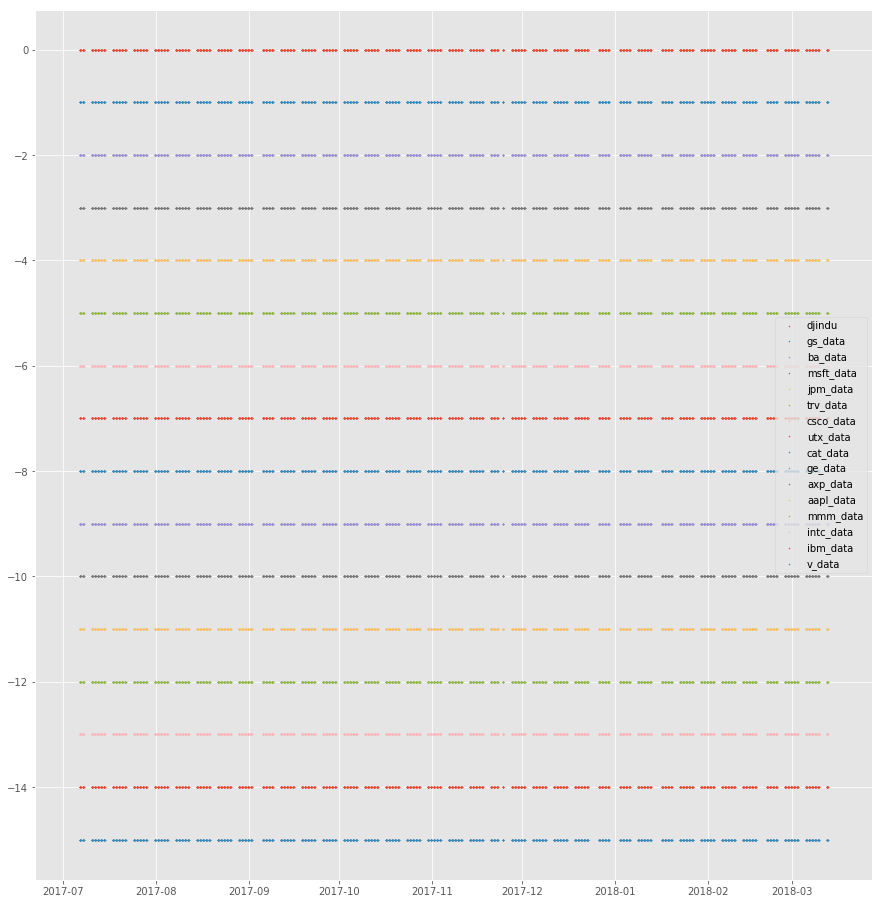

In [20]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

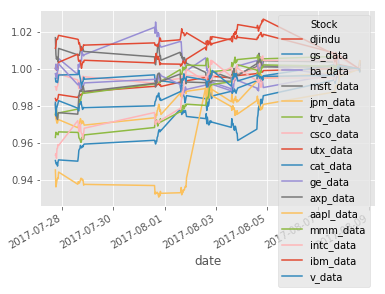

In [21]:
# View one day, normalized
data_window = df[200:300].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Stock')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()

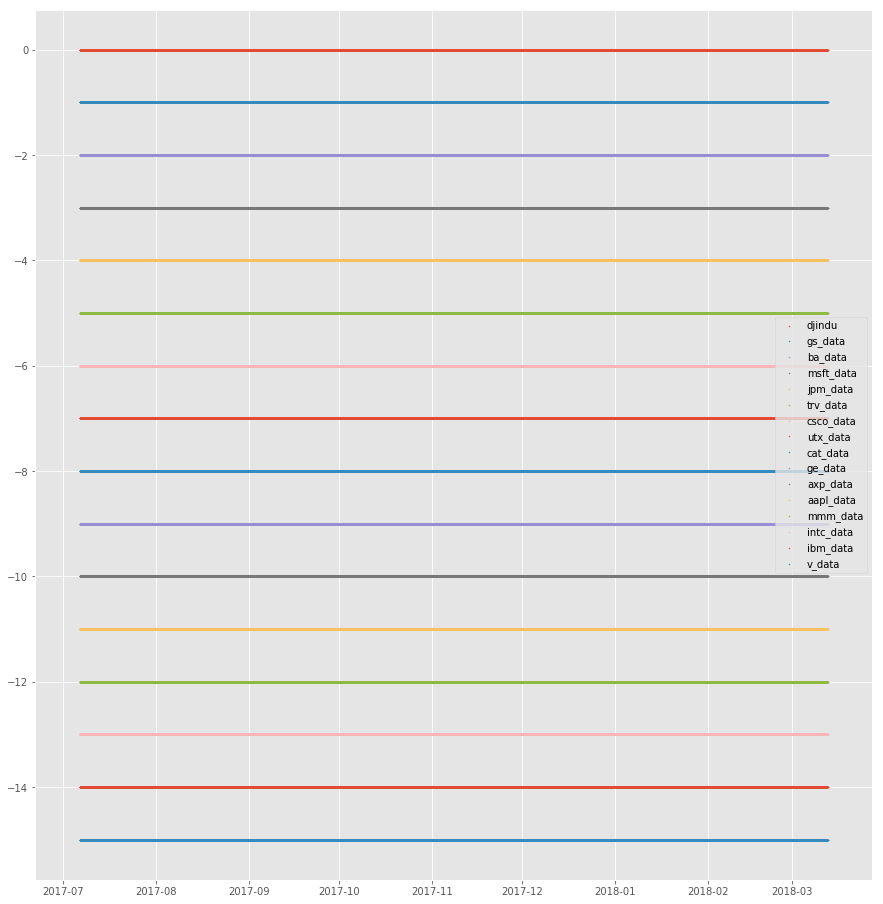

In [22]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

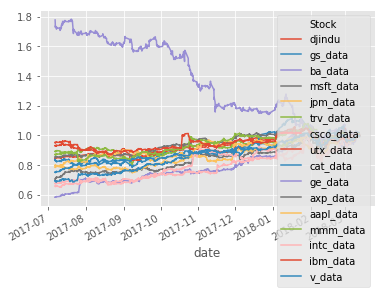

In [23]:
# View one day, normalized
data_window = df[0:30000].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Stock')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()